**Naive Bayes** is a family of probabilistic algorithms that take advantage of probability theory and Bayes’ Theorem to predict the tag of a text (like a piece of news or a customer review). They are probabilistic, which means that they calculate the probability of each tag for a given text, and then output the tag with the highest one. The way they get these probabilities is by using Bayes’ Theorem, which describes the probability of a feature, based on prior knowledge of conditions that might be related to that feature.

In [201]:
import pandas as pd 
data = pd.DataFrame({'Text':["A great game","The election was over","Very clean match"	,"A clean but forgettable game"	,"It was a close election"],
                     'Tag':['sports','Not sports','sports','sports','Not sports']})
data

,Text,Tag
0,A great game,sports
1,The election was over,Not sports
2,Very clean match,sports
3,A clean but forgettable game,sports
4,It was a close election,Not sports


Our training data has 5 sentences:

Now, which tag does the sentence A very close game belong to? (test data)

what we want is P (Sports | a very close game) — the probability that the tag of a sentence is Sports given that the sentence is “A very close game”.

In this case though, we don’t  numeric features. We just have text. We need to somehow convert this text into numbers that we can do calculations on.

So what do we do? Simple! We use **word frequencies**. That is, we ignore word order and sentence construction, treating every document as a set of the words it contains. Our features will be the counts of each of these words. 

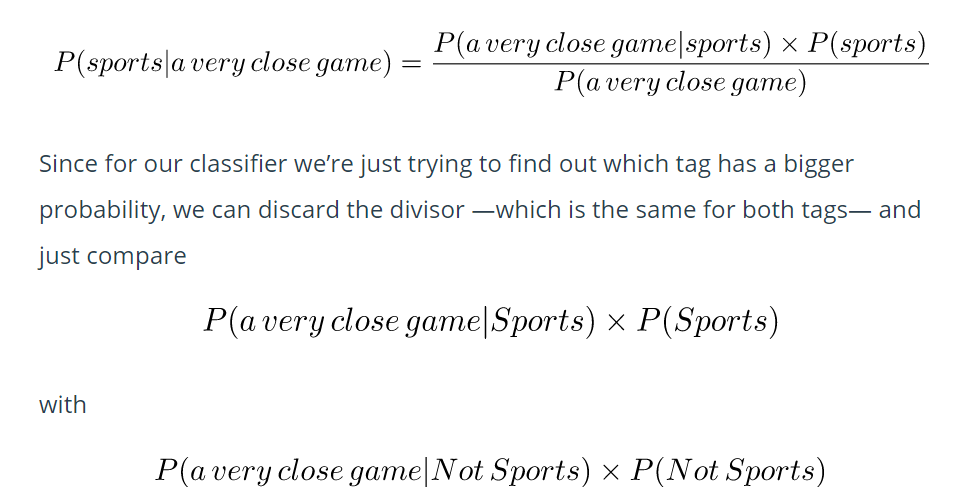

 count how many times the sentence “A very close game” appears in the Sports tag, divide it by the total, and obtain P (a very close game | Sports).

There's a problem though: “A very close game” doesn’t appear in our training data, so this probability is zero

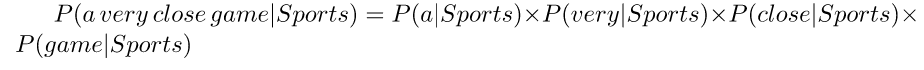

The Naive Bayes assumes each words is independent of other

p(sports) =3/5

p(not sports) =2/5

calculating P (game | Sports) means counting how many times the word “game” appears in Sports texts (2) divided by the total number of words in sports (11) is 2/11

“close” doesn’t appear in any Sports text! That means that P (close | Sports) = 0. 

using something called Laplace smoothing: we add 1 to every count so it’s never zero. To balance this, we add the number of possible words to the divisor, so the division will never be greater than 1

Since the number of possible words is 14 (use set of all words), applying smoothing we get that

2+1/11+14 = 3/25


In [202]:
test = "a very close game"
list_test = list(test.split(' '))
list_test

['a', 'very', 'close', 'game']

In [203]:
results = pd.DataFrame({'words': list_test})
results


,words
0,a
1,very
2,close
3,game


In [204]:
complete_text_sports = list(data[data.Tag=='sports']['Text'].str.split(' '))
complete_text_sports

[['A', 'great', 'game'],
 ['Very', 'clean', 'match'],
 ['A', 'clean', 'but', 'forgettable', 'game']]

In [205]:
text_sports_list=[]
for text in complete_text_sports:
  for i in range(len(text)):
    text_sports_list.append(text[i].lower())
text_sports_list

['a',
 'great',
 'game',
 'very',
 'clean',
 'match',
 'a',
 'clean',
 'but',
 'forgettable',
 'game']

In [206]:

complete_text_not_sports= list(data[data.Tag!='sports']['Text'].str.split(' '))
text_not_sports_list=[]
for text in complete_text_not_sports:
  for i in range(len(text)):
    text_not_sports_list.append(text[i].lower())
text_not_sports_list

['the', 'election', 'was', 'over', 'it', 'was', 'a', 'close', 'election']

In [207]:
word_length_sporta = len(text_sports_list)
word_length_not_sports = len(text_not_sports_list)
word_length_sporta,word_length_not_sports

(11, 9)

In [208]:
results

,words
0,a
1,very
2,close
3,game


In [209]:

def word_count_sports(col_value):
   return text_sports_list.count(col_value)


In [210]:
results['word_count_sports'] = results['words'].apply(word_count_sports) 

In [211]:

def word_count_not_sports(col_value):
   return text_not_sports_list.count(col_value)
results['word_count_not_sports'] = results['words'].apply(word_count_not_sports) 

In [212]:
results

,words,word_count_sports,word_count_not_sports
0,a,2,1
1,very,1,0
2,close,0,1
3,game,2,0


In [213]:
x =text_sports_list
x.extend(text_not_sports_list)
divisor = len(set(x))
divisor

14

In [218]:
results['prob_word_given_sports'] = (results['word_count_sports']+1)/(word_length_sporta+14)
results['prob_word_given_noT_sports'] = (results['word_count_not_sports']+1)/(word_length_not_sports+divisor)
results

,words,word_count_sports,word_count_not_sports,prob_word_given_sports,prob_word_given_noT_sports
0,a,2,1,0.12,0.086957
1,very,1,0,0.08,0.043478
2,close,0,1,0.04,0.086957
3,game,2,0,0.12,0.043478


In [219]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   words                       4 non-null      object 
 1   word_count_sports           4 non-null      int64  
 2   word_count_not_sports       4 non-null      int64  
 3   prob_word_given_sports      4 non-null      float64
 4   prob_word_given_noT_sports  4 non-null      float64
dtypes: float64(2), int64(2), object(1)
memory usage: 288.0+ bytes


In [220]:
#to calculate prob of word|sport and p(word|not sport)
p_sports = 1
p_not_sports =1
for index,row in results.iterrows():
  p_sports = p_sports*row[3]
  p_not_sports = p_not_sports *row[4]
  

p_sports,p_not_sports

(4.607999999999999e-05, 1.4293831139825827e-05)

In [221]:
p_sports>p_not_sports

True

Our classifier gives “A very close game” the Sports tag.!! we can improve the performance of the maodel 